In [7]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('new_data_actual.csv')

In [90]:
data.head(-1)

,Depth,WS,RH (%),Temp (Deg),PM0.23_0.30,PM0.30_0.40,PM0.40_0.50,PM0.50_0.65,PM0.65_0.80,PM0.80_1,PM1_1.6,PM1.6_2,PM2_3,PM3_4,PM4_5,PM5_7.5,PM7.5_10,PM10_15,PM15_20
0,412.0,2.500000,71.5,26.0,10.1,10.1,8.7,4.2,1.3,1.0,1.1,3.5,3.9,0.8,0.4,0.7,0.0,0.0,0.0
1,412.0,3.333333,71.3,26.0,10.3,10.4,9.0,4.4,1.4,1.1,1.1,2.5,2.6,0.6,2.4,5.0,3.0,5.7,0.0
2,412.0,2.222222,71.1,26.1,9.8,9.7,7.9,3.7,1.2,0.8,1.1,2.4,3.1,0.0,0.3,0.0,0.0,0.0,0.0
3,412.0,2.222222,71.1,26.1,10.1,10.1,8.4,4.1,1.4,1.0,1.3,3.4,5.5,1.3,1.7,1.5,1.9,2.9,0.0
4,412.0,0.833333,71.0,26.1,10.4,10.5,8.9,4.8,1.8,1.8,2.1,3.8,5.2,2.1,1.5,5.3,4.9,5.8,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,580.0,0.833333,81.9,24.9,3.8,3.4,1.9,0.7,0.2,0.3,0.2,0.8,1.1,0.4,0.4,0.0,0.0,0.0,0.0
1858,580.0,1.111111,81.7,24.9,3.8,3.3,1.9,0.7,0.2,0.1,0.3,0.6,0.7,0.1,0.1,0.7,0.0,0.0,0.0
1859,580.0,0.277778,81.7,24.9,4.0,3.5,1.9,0.7,0.2,0.2,0.3,0.6,1.0,0.3,0.2,0.4,0.0,0.0,0.0
1860,580.0,1.111111,81.7,25.0,4.0,3.4,1.9,0.7,0.2,0.1,0.3,0.7,0.8,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
a=np.array([580.0,1.666667,81.5,25.0])

In [104]:
a=a.reshape(1,-1)

In [147]:
aa=model1.predict(a)
aa

array([3.647])

In [177]:
aa=regr_2.predict(a)
aa

array([2.99265674])

In [65]:
data_points = pd.DataFrame()
data_points["Depth"] = data["Depth"]
data_points["WS"] = data["WS"]
data_points["RH (%)"] = data["RH (%)"]
data_points["Temp (Deg)"] = data["Temp (Deg)"]

In [74]:
data_points = np.array(data_points)

data_target = pd.DataFrame(data["PM0.23_0.30"])
data_target = np.array(data_target)
data_target = data_target.reshape(1,-1)[0]

data_target2 = pd.DataFrame(data["PM0.30_0.40"])
data_target2 = np.array(data_target2)
data_target2 = data_target2.reshape(1,-1)[0]

data_target3 = pd.DataFrame(data["PM0.40_0.50"])
data_target3 = np.array(data_target3)
data_target3 = data_target2.reshape(1,-1)[0]


In [75]:
data_points.shape,data_target.shape

((1863, 4), (1863,))

In [68]:
data_target

array([10.1, 10.3,  9.8, ...,  4. ,  4. ,  4.1])

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import check_random_state
from sklearn.model_selection import StratifiedKFold

#to check for a fitting random stateb

In [ ]:
li=[]
li2=[]
for i in range(1,100000):
    rng = check_random_state(i)
    x_train,x_test, y_train, y_test = train_test_split(data_points,data_target,random_state=rng)
    model = RandomForestRegressor(random_state=i,n_estimators=100)
    model.fit(x_train,y_train)
    predicted_y = model.predict(x_test)
    MAE = mean_absolute_error(y_test , predicted_y)
    sc = r2_score(y_test , predicted_y)
    MsE = mean_squared_error(y_test , predicted_y)
    #print('Random forest validation MAE = ', MAE)
    #print('Random forest validation scorers= ', sc)
    li.append(sc)
    li2.append(MsE)
print(li.index(max(li)),max(li))
print(li2.index(min(li2)),min(li2))


# using test_train_split

In [151]:
# Get the mean absolute error on the validation data
i=85773
rng = check_random_state(i)
x_train,x_test, y_train, y_test = train_test_split(data_points,data_target,random_state=rng)
model1 = RandomForestRegressor(random_state=i,n_estimators=100,warm_start=True,criterion='mae',n_jobs=5)
model1.fit(x_train,y_train)
predicted_y = model1.predict(x_test)
MAE = mean_absolute_error(y_test , predicted_y)
sc = r2_score(y_test , predicted_y)
print('Random forest validation MAE = ', MAE)
print('Random forest validation scorers= ', sc)

MsE = mean_squared_error(y_test , predicted_y)

print('Random forest validation MSE = ', MsE)


Random forest validation MAE =  0.4729924892703849
Random forest validation scorers=  0.9681336088302693
Random forest validation MSE =  0.6358349297210242


In [144]:
print(model1.feature_importances_,model1.criterion)

[0.38664404 0.05305204 0.37586959 0.18443433] mae


In [145]:
accuracy = evaluate(model1, x_test, y_test)

Model Performance
Average Error: 0.4730 degrees.
Accuracy = 88.12%.


In [146]:
accuracy = evaluate(model1, data_points, data_target)

Model Performance
Average Error: 0.6049 degrees.
Accuracy = 87.60%.


In [89]:
predicted_y = model1.predict(data_points)
MAE = mean_absolute_error(data_target, predicted_y)
sc = r2_score(data_target, predicted_y)
print('Random forest validation MAE = ', MAE)
print('Random forest validation scorers= ', sc)

MsE = mean_squared_error(data_target, predicted_y)

print('Random forest validation MSE = ', MsE)

Random forest validation MAE =  0.6392871229712622
Random forest validation scorers=  0.6409778465739631
Random forest validation MSE =  14.794463305589444


In [172]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(
estimator=RandomForestRegressor(),
param_grid={
'max_depth': range(3,7),
'n_estimators': (10, 50, 100, 1000),
},
cv=19, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
grid_result = gs.fit(x_train, y_train)
best_params = grid_result.best_params_
random_forest = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=85773, verbose=False)
random_forest.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error as mse
y_pred_test = random_forest.predict(x_test)
y_pred_train = random_forest.predict(x_train)
print("Mean Squared error on training data --> {}\nMean Squared error on test data --> {}".format(mse(y_train, y_pred_train), mse(y_test, y_pred_test)))

Mean Squared error on training data --> 28.767900784495787
Mean Squared error on test data --> 2.4378990424578526


/home/krupal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


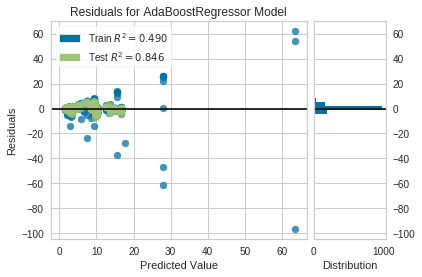

In [176]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr_2)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)  
visualizer.poof()

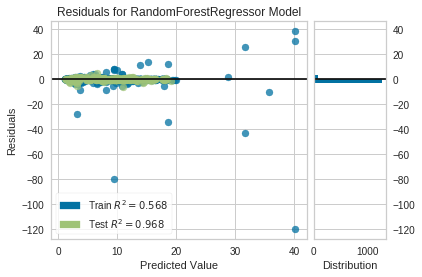

In [160]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model1)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)  
visualizer.poof()

In [173]:
from sklearn.ensemble import AdaBoostRegressor

In [174]:
regr_2 = AdaBoostRegressor(RandomForestRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

In [175]:
regr_2.fit(x_train, y_train)

/home/krupal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/krupal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/krupal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/krupal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/krupal/anaconda3/lib/python3.7/site-pa

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators='warn',
                                                       n_jobs=None,
                                                       oob_score=False,
                       

# RANDOM HYPERPARAMETER CROSS VALIDATION

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use')
pprint(rf.get_params())


Parameters currently in use
{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [34]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_points,data_target)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [38]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [39]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [69]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(data_points, data_target)
base_accuracy = evaluate(base_model, data_points, data_target2)

Model Performance
Average Error: 0.8930 degrees.
Accuracy = 83.86%.


In [70]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, data_points, data_target2)

Model Performance
Average Error: 0.9815 degrees.
Accuracy = 80.19%.


In [71]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -4.38%.
